# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This is a dataset that provides information about more than 100,000 patients in Brazil who scheduled medical appointments in the period of time between late April to early June, categorizing them according to whether they ended up showing for their appointment or not.

__Column names:__

PatientId ------> The ID number of the patient.

AppointmentID ------> The unique ID number of the appointment.

Gender ------> The gender of the patient.

ScheduledDay ------> The day of making the appointment.

AppointmentDay ------> The actual appointment day.

Age ------> The age of the patient.

Neighbourhood ------> The neighbourhood the hospital is located in.

Scholarship ------> Whether the patient is enrolled in Bolsa Família, a welfare program.

Hipertension ------> Whether the patient is hypertensive.

Diabetes ------> Whether the patient is diabetic.

Alcoholism ------> Whether the patient is alcoholic.

Handcap ------> Whether the patient is disabled, and if so, the severity of the disability.

SMS_received ------> Whether the patient received an SMS reminder of their appointment.

No-show ------> Whether they showed up for the appointment.

### Question(s) for Analysis

The central question posed in this dataset is: __"What are the factors that _correlate_ with better chances of showing up?"__ ; Show-up seems to be the dependent variable here. In order to try to answer this primary question, I asked the following:

__1-__ Which gender tended to show up more?

__2-__ Is a long time gap between the scheduling date and the appointment date associated with worse show-up rates? 

__3-__ What is the breakdown of age brackets of patients who showed up vs. those who didn't?

__4-__ Is the hospital location a factor?

__5-__ Are people more or less likely to show up if they are on welfare?

__6-__ What is the relation between having chronic conditions and the tendency to show up?

__7-__ Does the level of disability show a positive correlation with show-up?

__8-__ Does receiving an SMS reminder help in improving show up rates for people who had a long time to go until the appointment?

There are other questions that could also be asked, like the relation between age and having a chronic condition, or on which weekday do people tend to show up the most, but I'll refrain from asking those for the sake of not making this project excessively long.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [10]:
unique = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']

for col in unique:
    print(df[col].unique())

['F' 'M']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]
['No' 'Yes']


__Assessment:__

1- The dataset is 110,527 entries long, with 14 columns containing information about each row.

2- There are no missing values or duplicate rows, but there is a row where the age is listed as -1. 
Maybe it's a stand-in for a missing age value, or even a typo.

3- There is some work that needs to be done on datatypes to make them more appropriate, like converting dates to datetime, and converting data types to string for any column containing single digit data, as the numbers in this case are
not meant to be quantitative values, and might as well just be words.

4- The dataset actually contains information about 110,527 __appointments__ , but only 62299 patients.
This means that some patients have appeared more than once.

5- The columns that have value counts of 2 answer Yes/No questions using 0 and 1 values, and I think in the case of the
'Handcap' column use a range from 0 to 4 to indicate the severity of a disability from 'No Disabilty' to 'Severely Disabled'.

6- The use of 'F' and 'M' for gender is consistent throughout the whole dataset. This makes it so that when filtering I can get the correct number of entries using only 1 certain character. 

7- Lastly, there are some column names that are worth fixing or renaming all together for better look and use. I also believe it's better if column names are standardized to be all in lower case, with an underscore seperating words.


### Data Cleaning
 

In [11]:
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
df.drop(99832, axis=0, inplace=True)

df[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


__I dropped the 'PatientID' column because I didn't think I would need it.
While I noticed that there were some patients who appeared in the database more than once,
I concluded that it's every instance of an _appointment_ that I should be thinking in terms of to answer the particular question I posed earlier, regardless of the identity of the patient who made it.__

__I dropped the 'AppointmentID' because I won't be using it in my analysis, as it is specific to the appointment.__

__I also dropped the row with the nonsensical -1 age value, as it is only one row and wouldn't affect my analysis.
I actually looked that patient up via patient ID in a seperate notebook, and they only ever come up once, so there was no way to find out and fill in the accurate age from another row.__

In [12]:
df.rename(columns = lambda x: x.strip().lower(), inplace=True)

df.rename(columns = {'scheduledday' : 'scheduled_day',
                     'appointmentday' : 'appointment_day',
                     'scholarship' : 'on_welfare',
                     'hipertension' : 'hypertension',
                     'handcap' : 'handicap',
                     'no-show' : 'showed_up'}, inplace=True)

df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,on_welfare,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


__Here I applied some changed to column titles, like make them all lower case, and renaming without any typos and with underscores.__

__I also changed the 'scholarship' column to 'on_welfare' to make it clear that the dataset refers to a welfare program, as opposed to an educational scholarship.__

__Most importantly, I changed the 'no-show' column name to 'showed_up', in order to make the Yes/No answers less confusing to myself and others. I will follow this up with flipping the Yes and No values in the next step.__

In [13]:
df['showed_up'] = df['showed_up'].replace(to_replace=['Yes','No'], value=['NO','YES'])

df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,on_welfare,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,YES


__There we go! The Google Docs file stated that 'No' in the original dataset meant that the patient _did_ show up. It would be much clear and direct if I made it so that 'YES' meant showed up, and 'NO' meant didn't show up. I also went ahead and made it in all-caps since I just like the look of all-caps in the data better.__

In [14]:
df['scheduled_day'] = df['scheduled_day'].map(lambda x: x[:10])
df['appointment_day'] = df['appointment_day'].map(lambda x: x[:10])

df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,on_welfare,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,YES


__Above, I came back to trim down the day to just the date without the hour because I found a limitation in the exploration section below. Unfortunately, there is data only on the hour the appointment was scheduled, but the appointment date itself has only the date available, with the hour always defaulted to exactly midnight - this makes comparison between them a little awkward. I needed to make a column that was the difference between the scheduling and appointment dates, and the substraction yielded some negative values for people who set up their appointments on the same day. I concluded that it's better, if less precise, to calculate the the difference using just the number of days waited, without the hours. I will also convert them to datetime dtype below.__

In [15]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [16]:
col_list = ['on_welfare', 'hypertension', 'diabetes', 'alcoholism', 'sms_received']

for col in col_list:
    df[col] = df[col].astype(str).replace(to_replace=['0','1'], value=['NO','YES'])

In [17]:
old = ['0','1','2','3','4']
handicap_levels = ['None', 'Mild', 'Moderate', 'Serious', 'Severe']

df['handicap'] = df['handicap'].astype(str).replace(to_replace=old, value=handicap_levels)

__Lastly, I changed the dates to a datetime format to be able to substract them later on, and converted the 0/1 columns to a more appropriate string format, along with changing their values to the words 'YES' and "NO'. I also replaced the numbered values representing disability level with string values instead.__

__Now, Let's look at our dataset after all these changes.__

In [18]:
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,on_welfare,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,NO,YES,NO,NO,None,NO,YES


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
gender             110526 non-null object
scheduled_day      110526 non-null datetime64[ns]
appointment_day    110526 non-null datetime64[ns]
age                110526 non-null int64
neighbourhood      110526 non-null object
on_welfare         110526 non-null object
hypertension       110526 non-null object
diabetes           110526 non-null object
alcoholism         110526 non-null object
handicap           110526 non-null object
sms_received       110526 non-null object
showed_up          110526 non-null object
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 11.0+ MB


In [20]:
df.describe()

,age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


__Great! Now the data looks much better and easier to interact with. All data types are appropriate, typos have been corrected, columns have been renamed more appropriately, and the row with the very young -1 years-old person has been dropped, along with columns I won't be using for my analysis.__

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : (Which gender tended to show up more?)

In [21]:
df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

__It seems females are much more represented in this sample than males, so it would be better to work using their respective percentages to see if gender really was much of a factor in showing up. I'm going to divide the dataset into two genders, then make pie charts to see the show up rates for both.__

In [22]:
df_m = df.query('gender == "M"')
df_f = df.query('gender == "F"')

In [23]:
def pie_charts(position, status, df_x, color_1, color_2):
    
    """Displays two pie charts next to each other comparing show up rates for a particular subgroup of patients."""
    
    plt.subplot(1,2,position)
    plt.title('Patient Show Up - \n{}'.format(status), fontsize=15, color='brown')
    
    df_x['showed_up'].value_counts().plot(kind='pie', 
                                          figsize=(11,5),
                                          autopct='%1.1f%%',
                                          fontsize=15,
                                          startangle=90,
                                          explode=(0,0.1),
                                          shadow=True,
                                          label='',
                                          colors=[color_1,color_2])

__I defined the pie_charts() function above for later use, so I can just call it up while changing some variables later.__

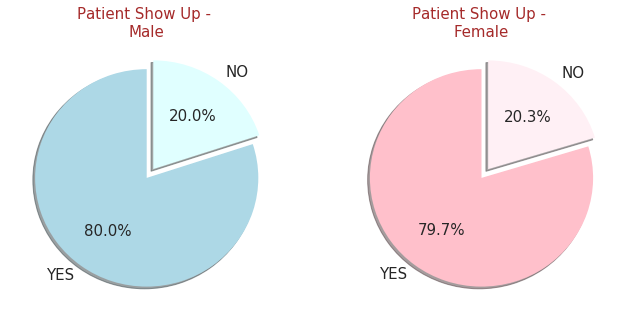

In [24]:
pie_charts(1, 'Male', df_m, 'lightblue', 'lightcyan')
pie_charts(2, 'Female', df_f, 'pink', 'lavenderblush')

In [25]:
df['showed_up'].value_counts(normalize=True)

YES    0.798066
NO     0.201934
Name: showed_up, dtype: float64

__Show up is about 80% for both.__

__It seems that gender is not really much of a factor in whether someone tends to show up for the appointment. Females and males show similar percentages for turning up to appointments, males very slightly more. These percentage are similar to the show up percentages of the sample regardless of gender, calculated above.__

### Research Question 2 : 

### (Is a long time gap between the scheduling date and the appointment date associated with worse show-up rates?)

In [26]:
difference = df['appointment_day'] - df['scheduled_day']
df.insert(3, 'wait_days', difference)

df.head(1)

,gender,scheduled_day,appointment_day,wait_days,age,neighbourhood,on_welfare,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,F,2016-04-29,2016-04-29,0 days,62,JARDIM DA PENHA,NO,YES,NO,NO,None,NO,YES


__To answer this question, it is necessary to first calculate the number of days between the scheduling date and the appointnment date in a new column I names 'wait_days'.__

In [27]:
df['wait_days'] = df['wait_days'].astype(str).map(lambda x: x[:2]).astype(int)

df['wait_days'].head()

0    0
1    0
2    0
3    0
4    0
Name: wait_days, dtype: int64

In [28]:
df['wait_days'].describe()

count    110526.000000
mean         10.028012
std          14.536631
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max          98.000000
Name: wait_days, dtype: float64

In [29]:
df[df['wait_days'] < 0]

,gender,scheduled_day,appointment_day,wait_days,age,neighbourhood,on_welfare,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
27033,M,2016-05-10,2016-05-09,-1,38,RESISTÊNCIA,NO,NO,NO,NO,Mild,NO,NO
55226,F,2016-05-18,2016-05-17,-1,19,SANTO ANTÔNIO,NO,NO,NO,NO,Mild,NO,NO
64175,F,2016-05-05,2016-05-04,-1,22,CONSOLAÇÃO,NO,NO,NO,NO,None,NO,NO
71533,F,2016-05-11,2016-05-05,-6,81,SANTO ANTÔNIO,NO,NO,NO,NO,None,NO,NO
72362,M,2016-05-04,2016-05-03,-1,7,TABUAZEIRO,NO,NO,NO,NO,None,NO,NO


__I made it so that the 'wait_days" values are single integer numbers.__

__There seems to be some non-sensical negative values that imply the scheduling day is after the appointment itself. I am going to drop these few rows from the dataset.__

In [30]:
df.drop(df[df['wait_days'] < 0 ].index, axis=0, inplace=True)
df.shape

(110521, 13)

In [31]:
df.describe().wait_days

count    110521.000000
mean         10.028556
std          14.536728
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max          98.000000
Name: wait_days, dtype: float64

__Now the wait days seem to fall into a logical range, from not waiting any number of days to waiting as much as 98 days.__

In [32]:
days_bin_edges = [-1,20,40,60,80,98]
days_bin_names = ['0-20 days', '21-40 days', '41-60 days', '61-80 days', '81-98 days']

df.insert(4,'wait_day_range', pd.cut(df['wait_days'], days_bin_edges, labels=days_bin_names))
df.head(1)

,gender,scheduled_day,appointment_day,wait_days,wait_day_range,age,neighbourhood,on_welfare,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,F,2016-04-29,2016-04-29,0,0-20 days,62,JARDIM DA PENHA,NO,YES,NO,NO,None,NO,YES


__I added a new column stating the time range that the wait time falls into, with the first edge being -1 in order to include 0. Using this, I think a bar chart would be best to demonstrate the proportions of show up versus no-show per wait range, along with the difference between them.__

__In the cell below, I will make calculation to get the proportions of:__

__1- The patients who showed up to the total.__

__2- The patients who didn't show up to the total.__

__3- The difference between show and no-show rates to the total.__

__All of this per every wait range group. Next, I'm going to make a stacked bar chart to visualize those, all within a function called bars().__

In [33]:
def bars(df_x, variable, title, xlabel, xtick_names, color_1, color_2, color_3):
    
    """Displays bar comparing show up rates, no-show rates, and the difference between them in proportion,
       according to a certain variable, along with printing relevent proportion calculations."""
    
    count = df_x.groupby(['showed_up',variable])[variable].count()
    delta = count['YES'] - count['NO']
    total = df_x[variable].value_counts()
    yes_prop = count['YES'] / total
    no_prop = count['NO'] / total
    diff_prop = delta / total
    
    print('YES\n', yes_prop, '\n\nNO\n', no_prop, '\n\nDIFF\n', diff_prop)
    
    ind = np.arange(len(yes_prop))
    width = 0.35
    locations = ind + width / 2
    
    plt.figure(figsize=(9,9))
    plt.title(title, fontsize=20, color='brown')
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel('Proportions', fontsize=20)
    plt.xticks(locations, xtick_names, fontsize=15)
    plt.yticks(fontsize=15)
    
    yes_bars = plt.bar(ind, yes_prop, width, color=color_1, alpha=0.7, label='YES')
    no_bars = plt.bar(ind, no_prop, width, color=color_2, alpha=0.7, label='NO')
    diff_bars = plt.bar((ind+width), diff_prop, width, color=color_3, alpha=1, label='DIFF')
    
    plt.legend()

YES
 wait_day_range
0-20 days     0.827019
21-40 days    0.667781
41-60 days    0.664182
61-80 days    0.708157
81-98 days    0.761589
Name: wait_day_range, dtype: float64 

NO
 wait_day_range
0-20 days     0.172981
21-40 days    0.332219
41-60 days    0.335818
61-80 days    0.291843
81-98 days    0.238411
Name: wait_day_range, dtype: float64 

DIFF
 wait_day_range
0-20 days     0.654037
21-40 days    0.335562
41-60 days    0.328363
61-80 days    0.416314
81-98 days    0.523179
Name: wait_day_range, dtype: float64


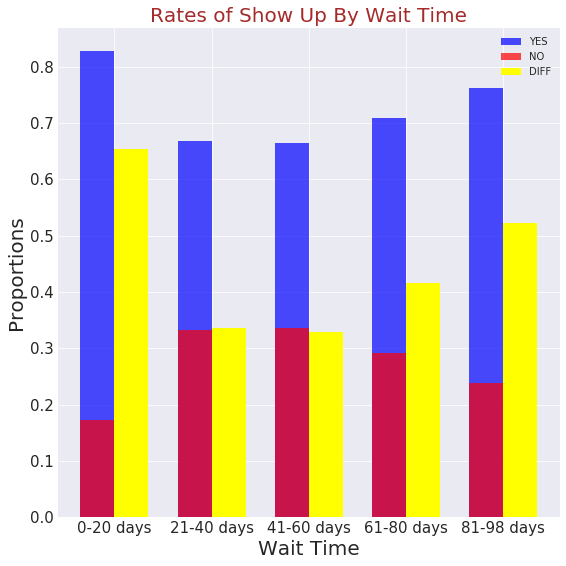

In [34]:
bars(df, 'wait_day_range', 'Rates of Show Up By Wait Time', 'Wait Time', days_bin_names, 'blue', 'red', 'yellow')

__We can see that the best show up rate occurs in the first group of people who waited for less than 20 days to go to the hospital. The rates then go down and no-shows go up for the two groups of people who waited from between 21 to 60 days for the appointment, But then they improve again for the last two groups, but not to the extent of the first group.__

__There seems to a positive correlation between either short wait time or really long wait time for the appointment, but waiting for a medium period of time is actually associated with worse show-up rates.__

### Research Question 3 : 

### (What is the breakdown of age brackets of patients who showed up vs. those who didn't?)

In [35]:
df['age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

__The average patient in general is middle-aged (about 37 years-old). I will divide the dataset into two, by show up.__

In [36]:
df_yes = df.query('showed_up == "YES"')
df_no = df.query('showed_up == "NO"')

In [37]:
print(df_yes['age'].median())
print(df_no['age'].median())

print(df_yes['age'].std())
print(df_no['age'].std())

38.0
33.0
23.338645064053026
21.965009201236228


__The median age of people who showed up for their appointment seems to be a little older than the median age of people who didn't show up, with significant standard deviations from the mean of 23.3 and 22, respectively. I'm now going to divide the dataset by age group, and then find out the show up ratios per every age group.__

In [38]:
children = df.query('age >= 0 and age < 18')['showed_up'].value_counts()
younger_adults = df.query('age >= 18 and age < 36')['showed_up'].value_counts()
middle_aged = df.query('age >= 36 and age < 60')['showed_up'].value_counts()
seniors = df.query('age >= 60')['showed_up'].value_counts()

In [39]:
age_groups = {'Children' : children,
              'Younger Adults' : younger_adults,
              'Middle Aged' : middle_aged,
              'Seniors' : seniors}

for key, value in age_groups.items():
    yes_no_ratio = value[0] / value[1]
    print(key, '     ', yes_no_ratio)

Children       3.566044029352902
Younger Adults       3.1996394033764957
Middle Aged       4.210579128440367
Seniors       5.5325516815797595


__The calculations above are the show up ratios for every age group from youngest to oldest. We can observe that the ratio goes up with increase in age, meaning that as people get older, they are more likely to show for their appointment then not.__

__Next, I'm going to be making a histogram showing the numbers of people who showed up vs those who didn't, per every age group.__ 

In [40]:
def hist(df_s, show_up, histcolor):
    
    """Displays a histogram for show up and no-show numbers of patients from different age groups."""
    
    df_s['age'].plot.hist(bins=[0,17,35,59,115],
                          rwidth=0.5,
                          label=show_up,
                          color=histcolor,
                          alpha=0.8)
    plt.legend()

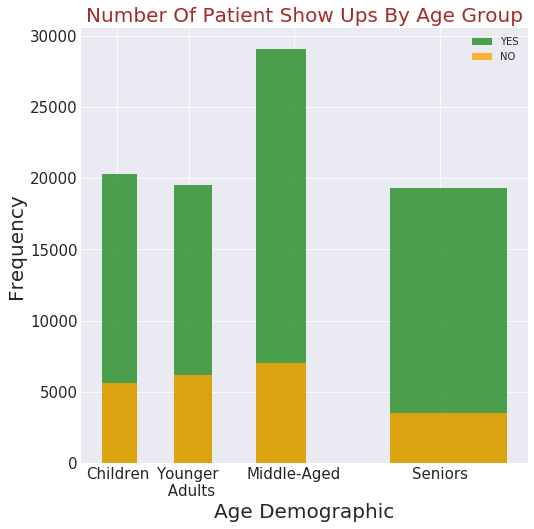

In [41]:
plt.figure(figsize=(8,8))
plt.title('Number Of Patient Show Ups By Age Group', fontsize=20, color='brown')
plt.xlabel('Age Demographic', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks([8,25,50,85], ['Children','Younger\n Adults','Middle-Aged','Seniors'], fontsize=15)
plt.yticks(fontsize=15)

hist(df_yes, 'YES', 'forestgreen')
hist(df_no, 'NO', 'orange')

__From the histogram above and the median ages per show up group, it seems that an older age is correlated with a higher chance of show up, as the average age for people who showed up 38 (middle age), the chart showing that they are the most to show up more than any other group, but only slightly not show up more compared to other groups. That, and seniors seem the most likely to end up going to the doctor more often than not. for the two younger age groups, the orange bar takes up more of the green, signifying worse show up rates.__

### Research Question 4 : 

### (Is the hospital location a factor?)

In [42]:
neigh = df['neighbourhood'].value_counts()
neigh_yes = df_yes['neighbourhood'].value_counts()
neigh_no = df_no['neighbourhood'].value_counts()

print(neigh[neigh == neigh.max()],)
print(neigh[neigh == neigh.min()], '\n')

print(neigh_yes[neigh_yes == neigh_yes.max()])
print(neigh_yes[neigh_yes == neigh_yes.min()], '\n')

print(neigh_no[neigh_no == neigh_no.max()])
print(neigh_no[neigh_no == neigh_no.min()], '\n')

print(df_yes['neighbourhood'][df_yes['neighbourhood'] == 'AEROPORTO'].count())

JARDIM CAMBURI    7717
Name: neighbourhood, dtype: int64
PARQUE INDUSTRIAL    1
Name: neighbourhood, dtype: int64 

JARDIM CAMBURI    6252
Name: neighbourhood, dtype: int64
PARQUE INDUSTRIAL    1
Name: neighbourhood, dtype: int64 

JARDIM CAMBURI    1465
Name: neighbourhood, dtype: int64
AEROPORTO    1
Name: neighbourhood, dtype: int64 

7


__In the cell above I decided to do some exploration of the locations that appear most frequently in the dataset, and it seems that the JARDIM CAMBURI hospital is the one hospital that gets the most patients in general, whether they show up or not. but then there are other hospitals that show up only in the dataset as a yes. That doesn't mean it's a great hospital necessarily..
Same for AEROPORTO - if it showed in 'NO' the least but showed up 7 times in 'YES', that doesn't mean anything because the sample size from that hospital is really small, and even if I adjusted all these neighbourhoods by show/no-show proportions, I will still not be able to answer my question or draw any useful statistical results, Because there is a limitation in that only the name of the neighbourhood is included, and no other information.__ 

### Research Question 5 : 

### (Are people more or less likely to show up if they are on welfare?)

__Here I will also use a bar plot to visualise the proportions of show/no-show rates, according to welfare status.__

YES
 on_welfare
NO     0.801967
YES    0.762637
Name: on_welfare, dtype: float64 

NO
 on_welfare
NO     0.198033
YES    0.237363
Name: on_welfare, dtype: float64 

DIFF
 on_welfare
NO     0.603933
YES    0.525274
Name: on_welfare, dtype: float64


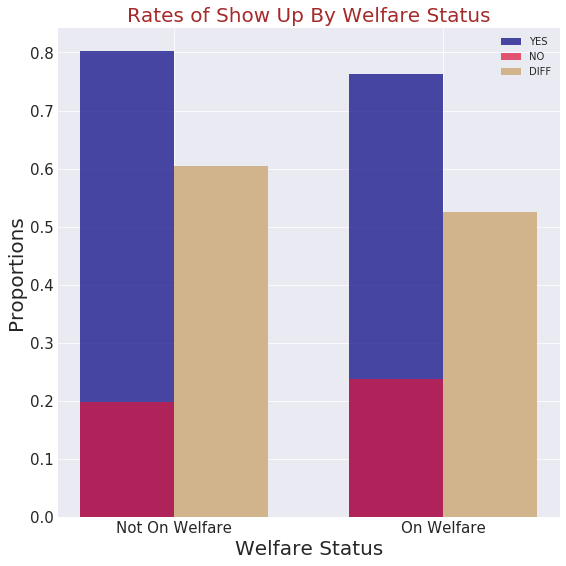

In [43]:
bars(df, 'on_welfare', 'Rates of Show Up By Welfare Status', 'Welfare Status', ['Not On Welfare','On Welfare'], 'navy', 'crimson', 'tan')

__From the bar plot above, we can see the people not on welfare actually seem to have a higher ratio than those on welfare; this basically means that those not on welfare tend to show up to the appointment more often than not, compared to welfare recipients who show a lower yes/no difference ratio.__

### Research Question 6 : 

### (What is the relation between having chronic conditions and the tendency to show up?)

__Here, I will examine the data to look at two types of people: those who have a chronic condition, and those who are healthy. I will seperate these two categories, then use pie_charts() to demonstrate the show up percentages for each.__

In [44]:
df_medical = df.query('hypertension == "YES" or diabetes == "YES" or alcoholism == "YES" or handicap != "None"')
df_healthy = df.query('hypertension == "NO" and diabetes == "NO" and alcoholism == "NO" and handicap == "None"')

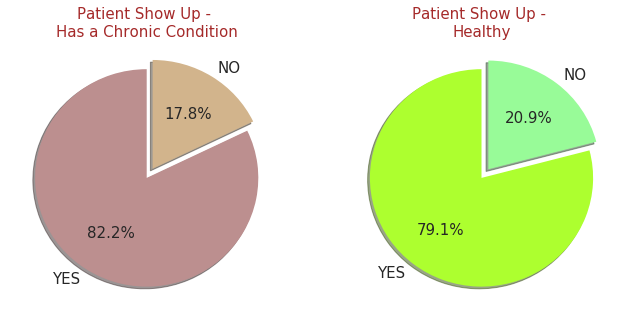

In [45]:
pie_charts(1, 'Has a Chronic Condition', df_medical, 'rosybrown', 'tan')
pie_charts(2, 'Healthy', df_healthy, 'greenyellow', 'palegreen')

__From the pie charts above, we can see that chronically ill people seem to show up at a slightly higher rate of 82.2%, more than healthy people (79.1%).__

### Research Question 7 :  (Does the level of disability show a positive correlation with show-up?)

__I will use a bar chart to visualize the relation between disability level and tendency to show up, using bars() again.__

YES
 Mild        0.821569
Moderate    0.797814
None        0.797667
Serious     0.769231
Severe      0.666667
Name: handicap, dtype: float64 

NO
 Mild        0.178431
Moderate    0.202186
None        0.202333
Serious     0.230769
Severe      0.333333
Name: handicap, dtype: float64 

DIFF
 Mild        0.643137
Moderate    0.595628
None        0.595334
Serious     0.538462
Severe      0.333333
Name: handicap, dtype: float64


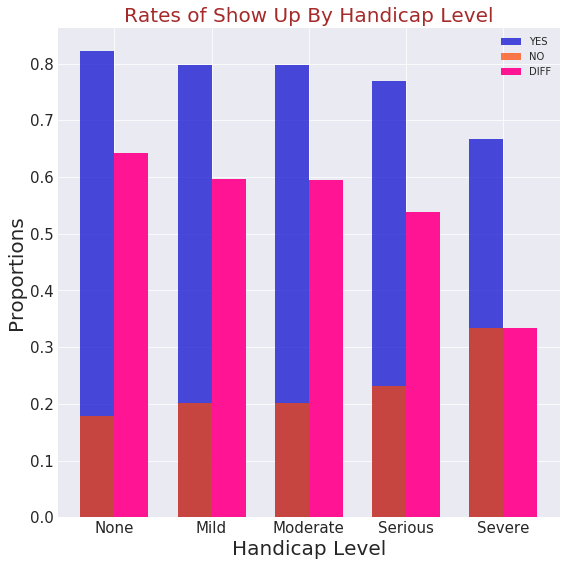

In [46]:
bars(df, 'handicap', 'Rates of Show Up By Handicap Level', 'Handicap Level', handicap_levels, 'mediumblue', 'orangered', 'deeppink')

__The above figure shows that as disability level gets more severe, there is a decrease in show up rates and an increase in
no-show rates (negative correlation with show up).__

### Research Question 8 : 

### (Does receiving an SMS reminder help in improving show up rates for people who had a long time to go until the appointment?)

__For this last question, I'm going to compare two types of patients: the ones who got an SMS message reminder of their appointment, and the ones who did not. I'm then going to make two seperate bar charts for each group, in order to find out the effect of the SMS on show up proportions per wait time. I'm going to first seperate the dataset into two, by SMS reception status.__

In [47]:
df_no_sms = df.query('sms_received == "NO"')
df_got_sms = df.query('sms_received == "YES"')

YES
 wait_day_range
0-20 days     0.857183
21-40 days    0.622779
41-60 days    0.623993
61-80 days    0.640857
81-98 days    0.747126
Name: wait_day_range, dtype: float64 

NO
 wait_day_range
0-20 days     0.142817
21-40 days    0.377221
41-60 days    0.376007
61-80 days    0.359143
81-98 days    0.252874
Name: wait_day_range, dtype: float64 

DIFF
 wait_day_range
0-20 days     0.714366
21-40 days    0.245559
41-60 days    0.247986
61-80 days    0.281713
81-98 days    0.494253
Name: wait_day_range, dtype: float64


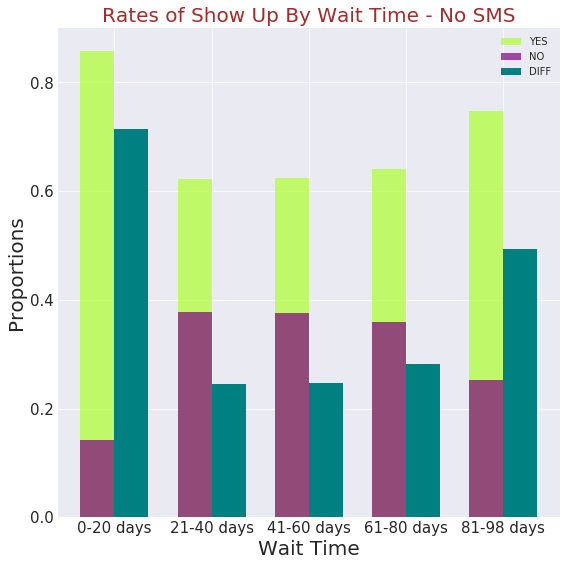

In [48]:
bars(df_no_sms, 'wait_day_range', 'Rates of Show Up By Wait Time - No SMS', 'Wait Time', days_bin_names, 'greenyellow', 'purple', 'teal')

YES
 wait_day_range
0-20 days     0.737785
21-40 days    0.696213
41-60 days    0.686992
61-80 days    0.747137
81-98 days    0.767442
Name: wait_day_range, dtype: float64 

NO
 wait_day_range
0-20 days     0.262215
21-40 days    0.303787
41-60 days    0.313008
61-80 days    0.252863
81-98 days    0.232558
Name: wait_day_range, dtype: float64 

DIFF
 wait_day_range
0-20 days     0.475570
21-40 days    0.392426
41-60 days    0.373984
61-80 days    0.494275
81-98 days    0.534884
Name: wait_day_range, dtype: float64


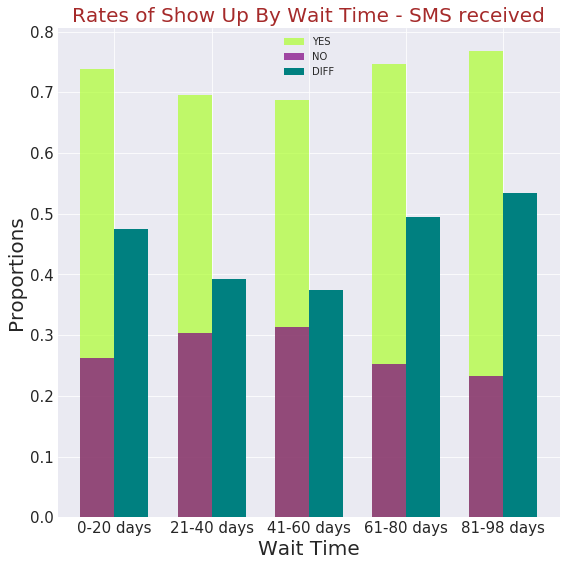

In [49]:
bars(df_got_sms, 'wait_day_range', 'Rates of Show Up By Wait Time - SMS received', 'Wait Time', days_bin_names, 'greenyellow', 'purple', 'teal')

__From these two bar plots above, I can observe the following:__

__1- For the group of people who waited 0-20 for the appointment, the ones who received an sms unexpectedly showed _worse_ 
show up proportions than the group that got the SMS.__

__2- For the second, third, and fourth group, the ones who received an SMS showed up at higher rates than the ones who didn't. It seems that the reminder helped in their case (positive correlation).__

__3- For the group that waited the longest, an SMS didn't really make a difference in whether they ended up showing or not. They show up by about the same rate in both cases.__

<a id='conclusions'></a>
## Conclusions

__Through making calculations to arrive at the proportions of appointments showed up for vs those not showed for per variable (age of the patient, gender, handicap level, etc.), and using pie charts, bar charts, and histograms to communicate those proportions, I arrived at the following findings:__

__1- No gender showed up at a significant rate more than the other. Men showed up more by just 0.3% than women, so there's not much of a difference.__

__2- Either short or very long time between the scheduling day and the appointment day is correlated with _better_ chances of show up, but waiting a moderate to long time from 20-80 days is correlated with worse show up rates.__

__3- Most patients are middle aged in general. Median patient who showed up is 38 (middle-aged), While the median patient who didn't is 33 (young adult). Older age (middle-age and beyond) is associated with better show up rates, while younger people showed worse show up rates.__

__4- I couldn't really answer this question because of limitations.__

__5- People are less likely to show up if they are welfare recipients.__

__6- Having a chronic condition slightly increases show up rates compared to healthy people.__

__7- The level of disability has a negative correlation with the show up rate.__

__8- An SMS reminder helped people show up more in the case of patients who waited from 20-80 days. It doesn't seem to help people who waited more than that, and it actually seems to be correlated with with worse show up rates in the 0-20 days bracket. It's probably not that the SMS  _caused_ them to not go, but that is the appearant correlation from the charts. 
Maybe the reason behind the patient having to get an SMS despite the short wait time is itself the cause of the worse show up rate, but I can't know that for sure with what is available to me.__

__Particularly factors to consider when thinking of correlation with show up are:__

(age - the time between scheduling and appointment - welfare status - chronic conditions - disability - SMS reminder)

__I conclude that an example of the ideal patient with the most probability of showing up is an old man who waited
a short time for their medical appointment. That person isn't on welfare, does have a chronic condition, is able-bodied, and didn't receive an SMS.__

__I'm going to compare the ideal patient to the general patients in the sample, using pie charts and calculations.__

In [50]:
df_ideal = df.query('gender == "M" and age > 59 and wait_day_range == "0-20 days" and on_welfare == "NO" and hypertension == "YES" and diabetes == "YES" and alcoholism == "YES" and handicap == "None" and sms_received == "NO"')

df_ideal.head()

,gender,scheduled_day,appointment_day,wait_days,wait_day_range,age,neighbourhood,on_welfare,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
2166,M,2016-04-29,2016-04-29,0,0-20 days,65,SÃO JOSÉ,NO,YES,YES,YES,None,NO,YES
8976,M,2016-05-11,2016-05-12,1,0-20 days,74,ARIOVALDO FAVALESSA,NO,YES,YES,YES,None,NO,YES
12734,M,2016-05-06,2016-05-06,0,0-20 days,77,MARUÍPE,NO,YES,YES,YES,None,NO,YES
12781,M,2016-05-10,2016-05-10,0,0-20 days,62,SANTO ANTÔNIO,NO,YES,YES,YES,None,NO,YES
13743,M,2016-05-13,2016-05-17,4,0-20 days,75,DA PENHA,NO,YES,YES,YES,None,NO,YES


In [51]:
print(df_ideal['showed_up'].value_counts(normalize=True))
print(df['showed_up'].value_counts(normalize=True))

YES    0.890625
NO     0.109375
Name: showed_up, dtype: float64
YES    0.798102
NO     0.201898
Name: showed_up, dtype: float64


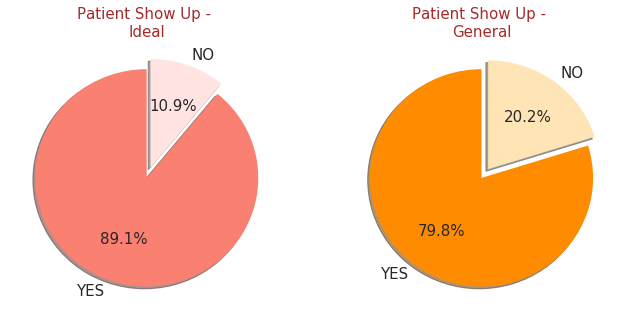

In [52]:
pie_charts(1, 'Ideal', df_ideal, 'salmon', 'mistyrose')
pie_charts(2, 'General', df, 'darkorange', 'moccasin')

__Here, we can see that the ideal type of patient is 9.3% more likely to show up for a medical appointment than the general sample.__

### Limitations:

__1- Appointment day only lists the day of the appointment, without being precise as to the hour, forcing me to calculate the wait time in days which is less precise, as the wait time would count as 0 days even if the person waited for 23:59:59 hours, for example.__

__2- I couldn't answer the 4th question I posed related to the neighbourhood, since the data doesn't include anything about the neighbourhood other than just the name. Perhaps if the patient's place of residence were to be included along with its distance from the hospital location, then I would've been able to explore the relation between distance and show up rate.
Maybe providing a quality rating of the hospital would've enabled the relation between hospital quality and show-up rate to be explored.__

### Some helpful links:

https://www.kite.com/python/answers/how-to-calculate-a-pandas-dataframe-time-difference-between-two-columns-in-python

https://www.statology.org/pandas-unique-values-in-column/

https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe

https://stackoverflow.com/questions/21090316/plotting-pandas-dataframes-in-to-pie-charts-using-matplotlib

https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python

https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column/22238380

https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

https://stackoverflow.com/questions/34094596/python-matplotlib-pyplot-pie-charts-how-to-remove-the-label-on-the-left-side

## Submitting your Project 

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0